# Assignment 1: Uninformed Search

Zach Goodenow

## Overview

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  You will implement both
search algorithms in python and test them on a simple graph.

## Required Code

In this jupyter notebook, you must implement at least the following functions:

  * `breadthFirstSearch(startState, goalState, successorsf)` 
  * `depthFirstSearch(startState, goalState, successorsf)`
  
Each receives as arguments the starting state, the goal state, and a successors function.  `breadthFirstSearch` returns the breadth-first solution path as a list of states starting with the `startState` and ending with the `goalState`.  `depthFirstSearch` returns the depth-first solution path.

<font color="red">You must</font> implement the search algorithm as specified in [A3 Problem-Solving Agents](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/03 Problem-Solving Agents.ipynb) lecture notes.

If you prefer to develop your python code in a separate editor or IDE, you may do so.  If it is stored in a file called `A1mysolution.py`, you can use it here by executing the following cell.

When your solution works, <font color="red">Remember</font> to remove or comment out the following import statement and instead, paste in all of your function definintions into this notebook.

## MY WORK

Below is the method for Breadth First Search and Depth First Search

Since the algorithms for each search are very similar, a simple boolean can separate the results for each:
<br>    -If breadth: True -> add new states to BACK of expansion queue (unexpanded)
<br>    -If depth: False -> add new states to FRONT of expansion queue (unexpanded)

In [84]:
def breadthFirstSearch(startState, goalState, successorsf):
	return search(startState, goalState, successorsf, True)
	
	
def depthFirstSearch(startState, goalState, successorsf):
	return search(startState, goalState, successorsf, False)


def search(startState, goalState, successorsf, breadthFirst):
	expanded = {} #visited nodes map to their parent
	unexpanded = [(startState, None)] #touched nodes
    
    #Base Case
	if startState == goalState:
		return [startState]

	while unexpanded:
		eval = unexpanded.pop()
		state = eval[0]
		parent = eval[1]
		children = successorsf(state)
		#Add state and parent to expanded dict
		if state not in expanded.keys():
			expanded[state] = parent
		#For efficiency, remove from children any states that are already in expanded or unExpanded.
		visited = [n[0] for n in unexpanded]
		visited += expanded.keys()
		children = [x for x in children if x not in visited]
		
		#Check if goal has been found
		if goalState in children:
			path = [state, goalState]
			
			while parent:
				path.insert(0, parent)
				parent = expanded[parent]
				
			return path
			
		#Sort and reverse children so we all get same solutions
		children.sort()
		children.reverse()
		
		children_mod = [(x,state) for x in children]
		if breadthFirst:
			unexpanded = children_mod + unexpanded
		else:
			unexpanded += children_mod

	return [None]


# List Example

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [32]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [33]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [34]:
successorsf('d')

['j', 'z']

In [74]:
print('Breadth-first')

#Valid requests
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('NEW path from a to a is', search('a', 'a', successorsf, True))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('NEW path from a to m is', search('a', 'm', successorsf, True))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))
print('NEW path from a to z is', search('a', 'z', successorsf, True))

Breadth-first
path from a to a is ['a']
NEW path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
NEW path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']
NEW path from a to z is ['a', 'd', 'z']


In [75]:
#Absent goalState
print('path from a to x is', breadthFirstSearch('a', 'x', successorsf))
print('NEW path from a to x is', search('a', 'x', successorsf, True))

path from a to x is [None]
NEW path from a to x is [None]


In [76]:
#Absent startState
print('path from x to a is', breadthFirstSearch('x', 'a', successorsf))
print('NEW path from x to a is', search('x', 'a', successorsf, True))

path from x to a is [None]
NEW path from x to a is [None]


In [77]:
#Absent startState and goalState
print('path from w to y is', breadthFirstSearch('w', 'y', successorsf))
print('NEW path from w to y is', search('w', 'y', successorsf, True))

path from w to y is [None]
NEW path from w to y is [None]


In [72]:
print('Depth-first')

#Valid requests
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('NEW path from a to a is', search('a', 'a', successorsf, False))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('NEW path from a to m is', search('a', 'm', successorsf, False))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))
print('NEW path from a to z is', search('a', 'z', successorsf, False))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


In [78]:
#Non-valid path
print('path from h to a is', depthFirstSearch('h', 'a', successorsf)) #none
print('NEW path from h to a is', search('h', 'a', successorsf, False))

path from h to a is [None]
NEW path from h to a is [None]
path from c to a is ['c', 'a']
NEW path from c to a is ['c', 'a']
path from c to z is ['c', 'a', 'b', 'e', 'k', 'z']
NEW path from c to z is ['c', 'a', 'b', 'e', 'k', 'z']


In [79]:
#Strange paths
print('path from c to a is', depthFirstSearch('c', 'a', successorsf))
print('NEW path from c to a is', search('c', 'a', successorsf, False))
print('path from c to z is', depthFirstSearch('c', 'z', successorsf))
print('NEW path from c to z is', search('c', 'z', successorsf, False))

path from c to a is ['c', 'a']
NEW path from c to a is ['c', 'a']
path from c to z is ['c', 'a', 'b', 'e', 'k', 'z']
NEW path from c to z is ['c', 'a', 'b', 'e', 'k', 'z']


# Grid Example

In [61]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:
        for c in [-1, 0, 1]:# List Example# List Example
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  # cool, huh?
                succs.append( (newr, newc) )
    return succs

In [13]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [14]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [15]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [62]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [97]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

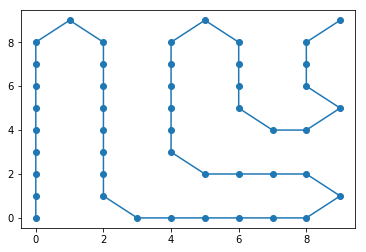

In [66]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [67]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

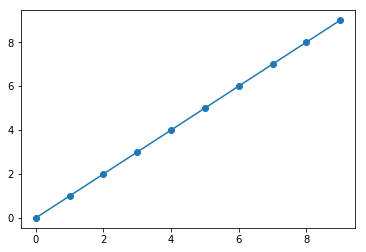

In [68]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [69]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

[None]

In [96]:
path = breadthFirstSearch((0, 0), (9,10), gridSuccessors)
path

[None]

## Problems & Notes

1.) Started writing methods for each search individually until I found the proper algorithm
<br><br>
2.) Pass by reference is important.  I kept running into a problem when I would change the case of the while loop.  Once you bring a variable into a larger scope, it might affect the code around it without directly changing that code
<br><br>
3.) At one point, I had a method for BFS and DFS working for the list example.  Once I tested it on the grid example, everything fell apart.  The main reason for this was because I was hard coding the states to be characters and introducing tuples broke my code in a few places.  I restarted with a brand-new file with problems 1.) and 2.) in mind and figured it out.  I actually used my old method to run checks on new methods which is why some examples have "NEW" at the start of their print lines.
<br><br>
4.) I worked on this assignment by making .py files and editing them in textWrangler and running them in Terminal.  I would run a few lines of raw python in Terminal if I was unsure about the behavior or syntax for a small problem.  After I liked my solution, I copied and pasted it into this notebook.  I think there would be a more efficient way to do this, so I might consider PyCharm.
<br><br>
5.) One of the most important things was to test the code further than the tests provided.  I have a lot more tests in my local .py files but I put a few that I found helpful into this notebook.
<br><br>
6.) I am unsure what the proper output should be if there is not a valid path.  I just return a list with "None" in it and I think that is pretty clear...

# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  You must define a new successors function, called `camelSuccessorsf`. 

In [86]:
def camelSuccessorsf(camelStartState):
    succs = []
    #Get index of empty space
    startSpaceIndex = camelStartState.index(' ')
    
    #Get info that wont change on the left and right
    hardLeft = camelStartState[0:max(startSpaceIndex - 2, 0)]
    hardRight = camelStartState[min(startSpaceIndex + 3, 9):9]
    mid = camelStartState[max(startSpaceIndex - 2, 0):min(startSpaceIndex + 3, 9)]
    
    spaceIndex = mid.index(' ')
    #Check options on left
    if 'R' in mid[:spaceIndex]:
    	#Option for camel on left of space to move right
    	mid_leftOp = list(mid)
    	switchIndex = -1
    	if mid[spaceIndex-1] == 'R':
            #switch space with index one to the left
    		switchIndex = spaceIndex-1
    	else: #if mid[spaceIndex-2] == 'L':
    		#Switch space with index two to the left
    		switchIndex = spaceIndex-2
    	a, b = mid_leftOp[switchIndex], mid_leftOp[spaceIndex]
    	mid_leftOp[switchIndex], mid_leftOp[spaceIndex] = b, a
    	combine_leftOp = hardLeft + tuple(mid_leftOp) + hardRight
    	succs.append(combine_leftOp)
    
    #Check Options on right
    if 'L' in mid[spaceIndex+1:]:
    	#Option for camel on right of space to move left
    	mid_rightOp = list(mid)
    	switchIndex = -1
    	if mid[spaceIndex+1] == 'L':
    		#switch space with index one to the right
    		switchIndex = spaceIndex+1
    	else: #if mid[spaceIndex+2] == 'R':
    		#Switch space with index two to the right
    		switchIndex = spaceIndex+2
    	a, b = mid_rightOp[switchIndex], mid_rightOp[spaceIndex]
    	mid_rightOp[switchIndex], mid_rightOp[spaceIndex] = b, a
    	combine_rightOp = hardLeft + tuple(mid_rightOp) + hardRight
    	succs.append(combine_rightOp)
    	
    return succs

In [89]:
camelStartState = ('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [90]:
camelGoalState = ('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

In [91]:
camelSuccessorsf(camelStartState)

[('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L')]

In [93]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')


[('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')]

In [94]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)

Breadth-first solution: ( 25 steps)
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
('R', 'R', 'R', 'L', ' ', 'L', 'R', 'L', 'L')
('R', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'L')
('R', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', ' ')
('R', 'L', 'R', 'L', 'R', 'L', ' ', 'L', 'R')
('R', 'L', 'R', 'L', ' ', 'L', 'R', 'L', 'R')
('R', 'L', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
(' ', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'R')
('L', 'L', 'R', 'L', 'R', 'L', ' ', 'R', 'R')
('L', 'L', 'R', 'L', ' ', 'L', 'R', 'R', 'R'

## Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar)  and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and summarize the algorithms.

Add at least one markdown cell that describes problems you encountered in trying to solve this assignment.

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/55296).

Grading will be based on 

  * correct behavior of the required functions, and
  * readability of the notebook.

In [95]:
%run -i A1grader.py

Searching this graph:
 {'a': ['b'], 'b': ['c', 'd'], 'c': ['e'], 'd': ['f', 'i'], 'e': ['g', 'h', 'i']}
Looking for path from a to b.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b']
Looking for path from a to i.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b', 'c', 'e', 'i']

A1 Grade is 80/100
Up to 20 more points will be given based on the qualty of your descriptions of the method and the results.
